# Data project - antidepressants 

Imports and set magics:

In [3]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
import ipywidgets as widgets
dst = pydst.Dst(lang='da')

#%run dataproject.py

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject as dp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\ladyk\AppData\Local\Temp\ipykernel_17452\2246150865.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
bitch = dp.getTotalCounts()

print(bitch[0].head())

In [ ]:
#checks the data for use of  seems correct
print(dp.Medicine_clean.head())

#Development in use of psycholeptica by age group, 2016-2021
dp.figure_1()

As shown in the above figure the use of psycholeptica is higher, the older you are. People that are 90 and older has the highest use psycholeptica per 100.000 people in all years. The use has mainly been decreasing for people above the age of 40, while it is increasing for people between 0-29. 

In [ ]:
J = (Medicine_clean['agegroup'] != '0-9 år') | (Medicine_clean['agegroup'] != '10-19 år') | (Medicine_clean['agegroup'] != '70-79 år') | (Medicine_clean['agegroup'] != '80-89 år') | (Medicine_clean['agegroup'] != '90 og derover')
Medicine_help=Medicine_clean[J]


Medicine_congregate = Medicine_help.groupby(['year']).sum()
Medicine_congregate.head()

In [ ]:
#pct-change




# Group the data by agegroup
Medicine_clean = Medicine_clean.sort_values(['year', 'agegroup'])
Medicin_pct = Medicine_clean.groupby('agegroup')

# Calculate the percentage change in count for each year
growth_rates = Medicin_pct['count'].pct_change()

# Print the result
Medicin_pct.head()

# Group the data by year and agegroup
Medicin_pct = Medicine_clean.groupby(['agegroup'])

# Calculate the percentage change in count for each group
growth_rates = Medicin_pct['count'].pct_change()

# Add the growth_rate series as a new column to the original dataframe
Medicine_clean['growth_rate'] = growth_rates*100

# Print the results without "not a number"

Medicine_clean_growth = Medicine_clean.dropna()

print(Medicine_clean_growth)

In [ ]:
med_pivot = pd.pivot_table(Medicine_clean, values='growth_rate', index=['agegroup'], columns=['year'])

# Create figure and axis objects
fig, ax = plt.subplots()

# Set width of each bar
bar_width = 0.15

# Create a bar for each year and age group
for i, year in enumerate(med_pivot.columns):
    x_pos = np.arange(len(med_pivot.index)) + (i * bar_width)
    ax.bar(x_pos, med_pivot[year], width=bar_width, label=str(year))

# Set x-axis and y-axis labels and ticks
ax.set_xticks(np.arange(len(med_pivot.index)))
ax.set_xticklabels(med_pivot.index, rotation=45, ha='right')
ax.set_xlabel('Age group')
ax.set_ylabel('Growth rate')

# Set legend
ax.legend(title='Year')

# Set title
ax.set_title('Development in use of psycholeptica by age group')

# Show the plot
plt.show()

# Read and clean data

In [ ]:
HFUDD11_true = dst.get_data(table_id = 'HFUDD11', variables={'TID':['*'],'ALDER':['*'], 'HFUDD':['*']})
#HFUDD11_true = HFUDD11_true.drop() #Drop alle med 2008-2015
HFdropped = HFUDD11_true.drop('BOPOMR',axis=1)
HFdropped = HFdropped.drop('HERKOMST',axis=1)
HFdropped = HFdropped.drop('KØN',axis=1)
I = (HFdropped['ALDER'] == 'Alder i alt')
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['HFUDD'].str[3] != ' ')
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['TID'].astype(int) < 2016)
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['TID'].astype(int) > 2021)
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['ALDER'].str[0] == '1')
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['HFUDD'] == 'H35 Adgangsgivende uddannelsesforløb')
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['HFUDD'] == 'H80 Ph.d. og forskeruddannelser')
HFdropped.drop(HFdropped[I].index,inplace=True)

HFdropped['NEWALDER'] = HFdropped['ALDER'].str[0] + "0-" + HFdropped['ALDER'].str[0] + "9 år"
print(HFdropped.head(10))
HFcongregate = HFdropped.groupby(['TID', 'HFUDD']).sum()
Agecongregate = HFdropped.groupby(['TID', 'NEWALDER']).sum()



uddannelser = HFdropped['HFUDD'].unique().tolist()
udannelseslist = ['Grundskole', 'Gymnasiale uddannelser','Erhvervsfaglige uddannelser','Korte videregående uddannelser','Mellemlange videregående uddannelser', 'Bacheloruddannelser', 'Lange videregående uddannelser', 'Uoplyst mv.']
print(Agecongregate)
Uddannelsesdict = dict(zip(udannelseslist,uddannelser))
#print(Uddannelsesdict)
#congregate udgøres af 20-69 årige med forskellige uddannelser. Summer ikke til "Alder i alt", da der er nogen uddannelser der er fjernet (H35, H80, og øvrige)
#print(HFdropped.head(10))
#print(HFcongregate.head(10))

#to show that there is no missing
#print("Missing values distribution: ")
#print(HFUDD11_true.isnull().mean())
#print("")


In [13]:
#imports MEDICIN3
Medicin3_true = dst.get_data(table_id = 'MEDICIN3', variables={'TID':['*'], 'MEDICINTYPE':['*'], 'AGEBYGROUP':['*'], 'UDDANNELSE':['*']})
#removes unnecessary columns
Medicin3_dropped = Medicin3_true.drop('BNØGLE',axis=1)
Medicin3_dropped = Medicin3_dropped.drop('KØN',axis=1)

#cleans data so only the necessary variables are left
#I = (Medicin3_dropped['KØN'] != "Køn i alt")
#Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
#I = (Medicin3_dropped['BNØGLE'] != "Personer")
#Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['MEDICINTYPE'] != "N05 Psycholeptica")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['UDDANNELSE'] == "Uddannelser i alt")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'] == "Alder i alt")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'].str[0] == "0")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'].str[0] == "1")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'].str[0] == "7")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'].str[0] == "8")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'].str[0] == "9")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['INDHOLD'].str[0] == ".")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
Medicin3_dropped["INDHOLD"] = Medicin3_dropped["INDHOLD"].astype(int)

Medicin3_dropped.rename(columns={'UDDANNELSE':'HFUDD'}, inplace=True)
Medicin3_dropped.rename(columns={'INDHOLD':'Count'}, inplace=True)
Medicin3_dropped.rename(columns={'AGEBYGROUP':'NEWALDER'}, inplace=True)

for key,value in Uddannelsesdict.items():
   Medicin3_dropped.HFUDD.replace(key,value,inplace=True)
Medicin3_dropped.to_excel("output.xlsx") 
Medicin3congregate = Medicin3_dropped.groupby(['TID', 'HFUDD']).sum()
Medicin3Agecongregate = Medicin3_dropped.groupby(['TID', 'NEWALDER']).sum()
print(Medicin3Agecongregate.head(8))


               Count
TID  NEWALDER       
2016 20-29 år  26708
     30-39 år  31862
     40-49 år  51968
     50-59 år  70948
     60-69 år  79762
2017 20-29 år  27994
     30-39 år  31724
     40-49 år  50286


C:\Users\ladyk\AppData\Local\Temp\ipykernel_20832\3852084849.py:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Medicin3congregate = Medicin3_dropped.groupby(['TID', 'HFUDD']).sum()
C:\Users\ladyk\AppData\Local\Temp\ipykernel_20832\3852084849.py:40: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Medicin3Agecongregate = Medicin3_dropped.groupby(['TID', 'NEWALDER']).sum()


In [14]:
samlet = Medicin3congregate.join(HFcongregate,how='left',on=['TID','HFUDD'])
samletAge = Medicin3Agecongregate.join(Agecongregate,how='left',on=['TID','NEWALDER'])


andel=samlet['Count']/samlet['INDHOLD']
samlet['andel']=andel*100
print(samlet.head(8))
andelAge=samletAge['Count'].astype(int)/samletAge['INDHOLD'].astype(int)
samletAge['andel']=andelAge*100
print(samletAge.head(8))

                                                    Count  INDHOLD      andel
TID  HFUDD                                                                   
2016 H10 Grundskole                                 89878   750438  11.976739
     H20 Gymnasiale uddannelser                     17647   378147   4.666704
     H30 Erhvervsfaglige uddannelser                80219  1221258   6.568555
     H40 Korte videregående uddannelser, KVU         9257   193610   4.781261
     H50 Mellemlange videregående uddannelser, MVU  35772   584961   6.115279
     H60 Bacheloruddannelser, BACH                   3400    95754   3.550766
     H70 Lange videregående uddannelser, LVU        17782   366258   4.855048
     H90 Uoplyst mv.                                 7293    49056  14.866683
               Count  INDHOLD      andel
TID  NEWALDER                           
2016 20-29 år  26708   761756   3.506110
     30-39 år  31862   660739   4.822176
     40-49 år  51968   775672   6.699739
     50-59 år  

We have chosen only the age-groups 20-69, as this was the only agegroup of complete overlap between MEDICIN3 and HFUDD11.
 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

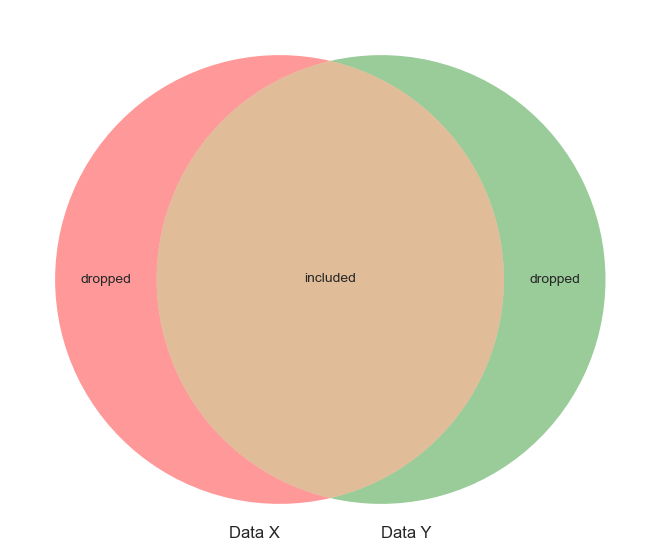

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

In [1]:
Medicine_clean["count"].describe()

NameError: name 'Medicine_clean' is not defined

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

In [ ]:
bitch, bitch2 = 

From the analysis of data over antidepresant use, we can conclude that in genereal antidepressants are more commonly used the older people get, but development over the analysed time period shows that young people (here age 0-30) is increasing the useage over time, while the elder generations is decreasing its use.

Other than that we have looked at data divided by education level, and from this we can conclude that idividuals that have only compleated their primary school is way more likely to use antidepressants than people with higher educations  